# Dataset 만들기ㅡ
- 인용 : https://scikit-learn.org/stable/datasets/sample_generators.html

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

## 1. make_blobs
* make_blobs 함수는 등방성 가우시안 정규분포를 이용해 가상 데이터를 생성한다. 
 * <font color='red'> 이 때 등방성이라는 말은 모든 방향으로 같은 성질을 가진다는 뜻이다. 
* 보통 클러스링 용 가상데이터를 생성하는데 사용한다. 
* make_blobs 함수의 인수와 반환값은 다음과 같다.

- n_samples : 표본 데이터의 수, 디폴트 100
- n_features : 독립 변수의 수, 디폴트 20
- centers : 생성할 클러스터의 수 혹은 중심, [n_centers, n_features] 크기의 배열. 디폴트 3
- cluster_std: 클러스터의 표준 편차, 디폴트 1.0
- center_box: 생성할 클러스터의 바운딩 박스(bounding box), 디폴트 (-10.0, 10.0))

### 반환값:
- X : [n_samples, n_features] 크기의 배열
- y : [n_samples] 크기의 배열

Text(0.5, 1.0, '세개의 클러스터를 가진 가상 데이터')

Text(0.5, 0, '$X_1$')

Text(0, 0.5, '$X_2$')

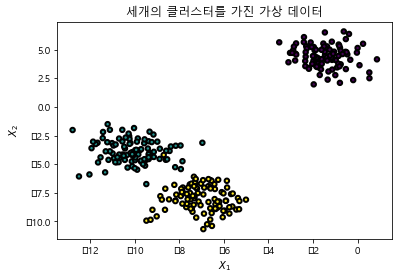

In [5]:
from sklearn.datasets import make_blobs

plt.title("세개의 클러스터를 가진 가상 데이터")
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=1, random_state=1)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=20,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

## 2. make_moons
make_moons 함수는 초승달 모양 클러스터 두 개 형상의 데이터를 생성한다. make_moons 명령으로 만든 데이터는 직선을 사용하여 분류할 수 없다.

인수:
- noise: 잡음의 크기. 0이면 정확한 반원을 이룸

Text(0.5, 1.0, '초승달 모양 클러스터를 가진 가상 데이터')

Text(0.5, 0, '$X_1$')

Text(0, 0.5, '$X_2$')

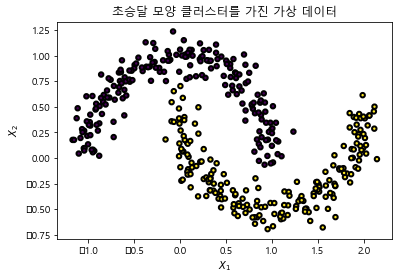

In [6]:
from sklearn.datasets import make_moons

plt.title("초승달 모양 클러스터를 가진 가상 데이터")
X, y = make_moons(n_samples=400, noise=0.1, random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=20,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

## 3. make_gaussian_quantiles
다차원 가우시안 분포의 표본을 생성하고 분포의 기대값을 중심으로 한 등고선으로 클래스를 분리한다. 함수의 인수와 반환값은 다음과 같다. 이 데이터는 타원형 형태의 닫힌 경계선으로만 분류할 수 있다.

인수:
- mean: 기댓값 벡터
- cov: 공분산 행렬
- n_samples : 표본 데이터의 수, 디폴트 100
- n_features : 독립 변수의 수, 디폴트 20
- n_classes : 클래스의 수

Text(0.5, 1.0, '등고선으로 구분되는 두 개의 클러스터를 가진 가상 데이터')

Text(0.5, 0, '$X_1$')

Text(0, 0.5, '$X_2$')

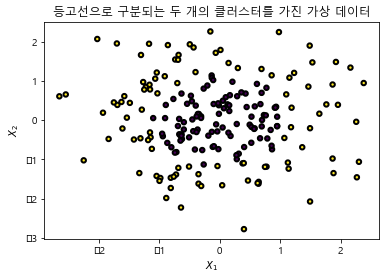

In [7]:
from sklearn.datasets import make_gaussian_quantiles

plt.title("등고선으로 구분되는 두 개의 클러스터를 가진 가상 데이터")
X, y = make_gaussian_quantiles(n_samples=200, n_features=2, n_classes=2, random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=20,
            edgecolor="k", linewidth=2)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

### 3차원 그리기

In [64]:
from mpl_toolkits import mplot3d

def plot_3d(X, y):
    plt.figure(figsize=(8,6))
    ax = plt.axes(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='rainbow')
    ax.view_init(10, 250) 

The data was generated from 175


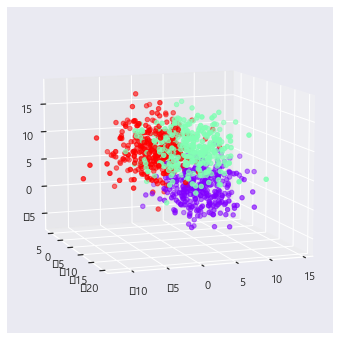

In [71]:
RANDOM_SEED = np.random.randint(2 ** 10)
X, y = make_blobs(n_samples=1000, n_features=3, centers=3, cluster_std=3,
                  random_state=RANDOM_SEED)

print(f'The data was generated from {RANDOM_SEED}')
plot_3d(X, y)

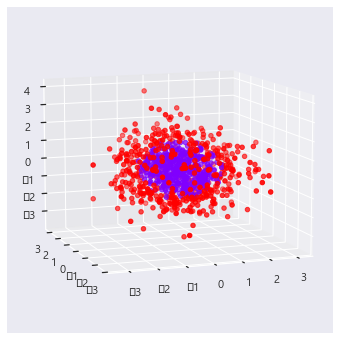

In [72]:
X, y = make_gaussian_quantiles(n_samples=1000, n_features=3, n_classes=2, 
                               random_state=RANDOM_SEED)
plot_3d(X, y)

# 가우시안 분포

## 1. univariate (1개 가우시안 분포)

In [8]:
import scipy.stats as stats

In [10]:
from scipy.stats import norm
rv = norm() # Random variates Class
rv.pdf(1.96) # Probability density function. 평균 0 , 분산 1, Z-distribution

0.058440944333451476

In [12]:
mu = 2; sigma = 2
data = np.array(sorted(np.random.normal(mu, sigma, 1000)))
fit = norm.pdf(data, np.mean(data), np.std(data)) # 
fit

array([7.69370070e-05, 1.75984376e-03, 2.79862332e-03, 8.07469363e-03,
       8.10440916e-03, 9.87644484e-03, 1.04709551e-02, 1.17280673e-02,
       1.29472128e-02, 1.29666186e-02, 1.42470656e-02, 1.46269737e-02,
       1.51173917e-02, 1.73642482e-02, 1.82131074e-02, 1.89078824e-02,
       1.93729981e-02, 2.01959144e-02, 2.02482604e-02, 2.04038357e-02,
       2.06045627e-02, 2.08599572e-02, 2.25822700e-02, 2.36517922e-02,
       2.63431676e-02, 2.78776429e-02, 2.85739596e-02, 3.03561423e-02,
       3.07261266e-02, 3.15862159e-02, 3.18712105e-02, 3.47037665e-02,
       3.55196057e-02, 3.61498620e-02, 3.67612186e-02, 3.88238834e-02,
       3.90339177e-02, 4.04917753e-02, 4.08642075e-02, 4.12779327e-02,
       4.39939302e-02, 4.40038520e-02, 4.40800672e-02, 4.49626409e-02,
       4.73467807e-02, 4.74916761e-02, 4.79394134e-02, 4.81522128e-02,
       4.95574731e-02, 5.28584845e-02, 5.37115650e-02, 5.47747006e-02,
       5.54446320e-02, 5.57402810e-02, 5.65339497e-02, 5.65680064e-02,
      

In [13]:
pd.DataFrame(np.vstack((data, fit)).T, columns = ['observation', 'probability density']).head()

,observation,probability density
0,-5.928637,0.000077
1,-4.165525,0.001760
2,-3.858798,0.002799
3,-3.088550,0.008075
4,-3.085674,0.008104


<Figure size 1080x216 with 0 Axes>

(array([0.00072323, 0.00144646, 0.02025048, 0.06581405, 0.14175335,
        0.18080784, 0.18948662, 0.09040392, 0.02242017, 0.01012524]),
 array([-5.92863661, -4.54595321, -3.16326981, -1.7805864 , -0.397903  ,
         0.9847804 ,  2.3674638 ,  3.7501472 ,  5.1328306 ,  6.51551401,
         7.89819741]),
 <a list of 10 Patch objects>)

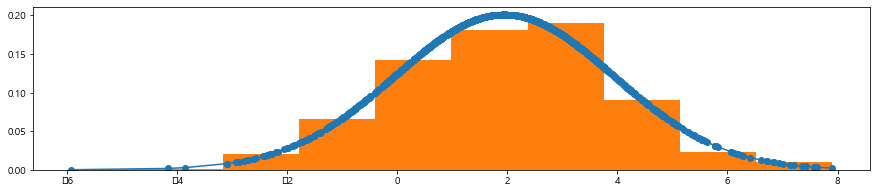

In [14]:
plt.figure(figsize=(15,3))
plt.plot(data, fit, '-o') # fit는 pdf(확률분포)
plt.hist(data, density=True) # 출현개수가 아니라 빈도로 표시(즉 확률)

## 2. multivariate (2개의 서로 독립변수의 가우시안 분포)

두 독립변수의 분포는 정규분포이고 y의 클래스에 따라 모수가 달라진다.
negative(y=0) 데이터가 800개, positive(y=1) 데이터 200개 

첫번째 모집단 평균과 :
\begin{vmatrix}
-2 \\
-2
\end{vmatrix}

공분산은
\begin{vmatrix}
1.0 & 0.9 & \\
0.9 & 2
\end{vmatrix}

array([[-1.87099378, -0.7612922 ],
       [-2.23119126, -1.7818422 ],
       [-3.39960191, -3.65866316],
       [-3.5981157 , -3.55124282],
       [-2.57469024, -4.39055424]])

array([[ 2.55144711,  1.94680218],
       [ 1.58026542,  3.91582847],
       [ 3.08895146,  1.53413986],
       [ 3.5732754 , -0.95220882],
       [ 2.50021539,  3.47271258]])

Text(0.5, 1.0, '데이터의 확률분포')

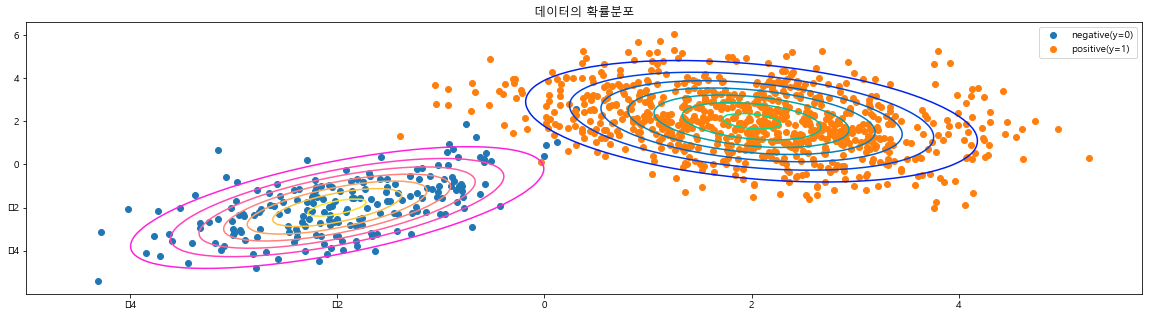

In [16]:
np.random.seed(13)

rv3 = stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = stats.multivariate_normal([2, 2], [[1.2, -0.5], [-0.5, 2]])
x0 = rv3.rvs(200); x1 = rv1.rvs(800) # it is a fitting! ()
x0[0:5]
x1[0:5]

#X = np.vstack([x0, x1]); y = np.hstack([np.zeros(1000), np.ones(5000)])

xx1 = np.linspace(-5, 5, 100); xx2 = np.linspace(-5, 5, 100)
xx1, xx2 = np.meshgrid(xx1, xx2)

fig = plt.figure(figsize=(20,5))
plt.contour(xx1, xx2, rv3.pdf(np.dstack([xx1, xx2])), cmap='spring')
plt.contour(xx1, xx2, rv1.pdf(np.dstack([xx1, xx2])), cmap='winter')
plt.scatter(x0[:, 0], x0[:, 1], label='negative(y=0)')
plt.scatter(x1[:, 0], x1[:, 1], label='positive(y=1)')
plt.legend(); plt.title("데이터의 확률분포")

plt.show()

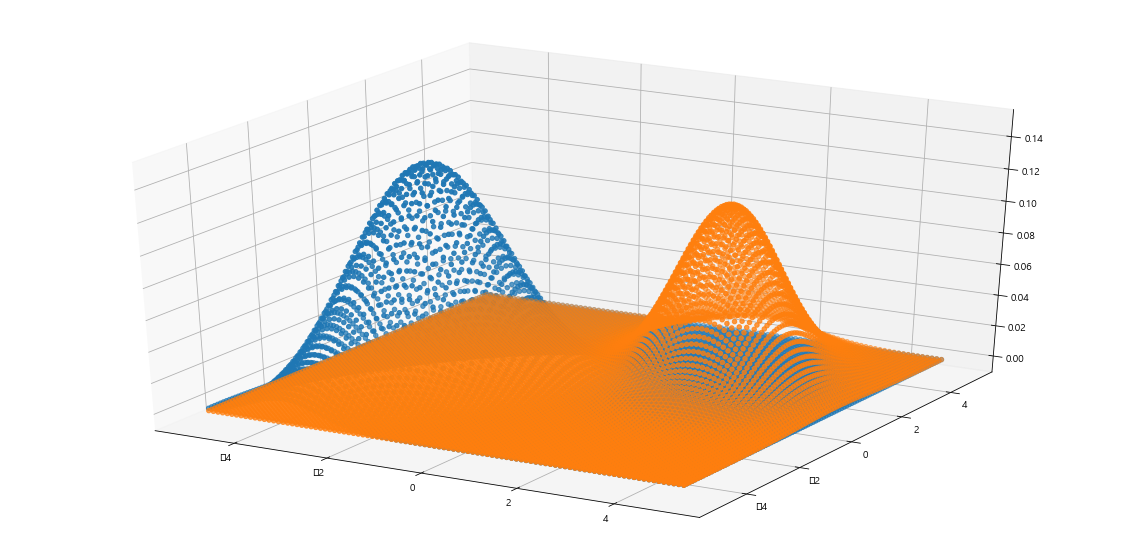

In [18]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.scatter3D(xx1, xx2, rv0.pdf(np.dstack([xx1, xx2])), cmap='spring')
ax.scatter3D(xx1, xx2, rv1.pdf(np.dstack([xx1, xx2])), cmap='winter')

# End